In [128]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [129]:
data = yf.download(tickers='AAPL', start=pd.to_datetime('2022-01-20'))#, interval='1d')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-20,166.979996,169.679993,164.179993,164.509995,163.311386,91420500
2022-01-21,164.419998,166.330002,162.300003,162.410004,161.226700,122848900
2022-01-24,160.020004,162.300003,154.699997,161.619995,160.442429,162294600
2022-01-25,158.979996,162.759995,157.020004,159.779999,158.615829,115798400
2022-01-26,163.500000,164.389999,157.820007,159.690002,158.526474,108275300


In [130]:
data = data.asfreq('b').fillna(method='ffill')

In [132]:
data['LogClose'] = np.log(data['Close'])

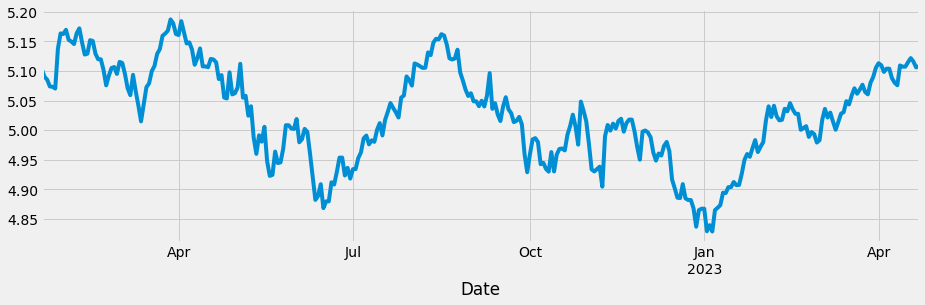

In [133]:
data['LogClose'].plot(figsize=(14,4))

In [134]:
from statsmodels.tsa.forecasting.theta import ThetaModel

tm = ThetaModel(data['LogClose'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:               LogClose   No. Observations:                  328
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Mon, 24 Apr 2023   Deseas. Method:         Multiplicative
Time:                        13:25:43   Period:                              5
Sample:                    01-20-2022                                         
                         - 04-24-2023                                         
     Parameter Estimates     
             Parameters      
-----------------------------
b0    -0.00031995655064084074
alpha      0.9679837225444929
-----------------------------


In [139]:
forecasts = {'stock': data['LogClose']}

n=30
for i in range(n, data.shape[0] ,n):
    sub = data['LogClose'].iloc[:i]
    res = ThetaModel(sub).fit()
    fcast = res.forecast(n)
    forecasts[i] = fcast
    
forecasts = pd.DataFrame(forecasts)

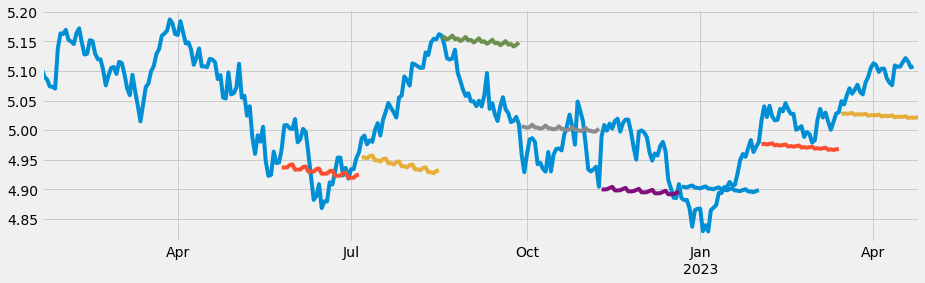

In [141]:
forecasts.drop(columns = [30,60]).plot(figsize = (14,4), legend = None)